In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy.stats import norm
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import make_scorer, mean_absolute_error
import pickle

**Mount Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/bitcoin dataset/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [ ]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
##Exploring data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [ ]:
data.isna().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [ ]:
y_1=norm(loc=data['Open'].mean(),scale=data['Open'].std()).pdf(data['Open'])

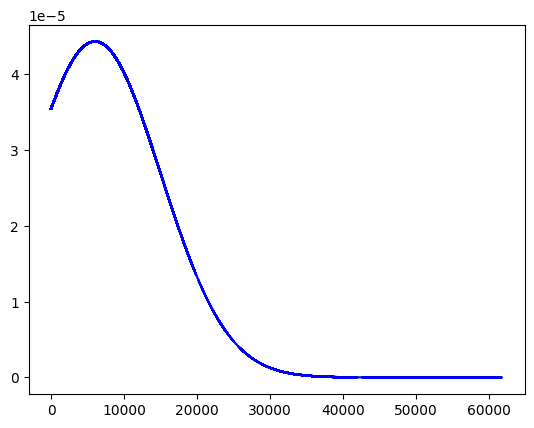

In [ ]:
plt.plot(data['Open'],y_1,c='blue')
plt.show()

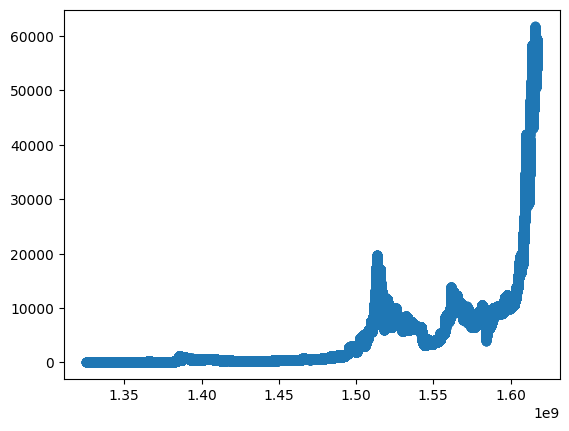

In [ ]:
plt.scatter(data['Timestamp'],data['Open'])

<Axes: xlabel='Open'>

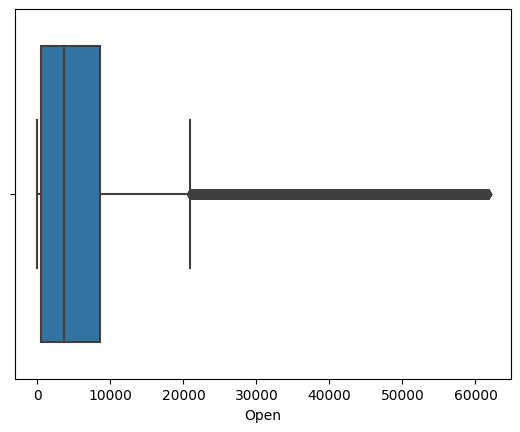

In [ ]:
sns.boxplot(x=data['Open'])

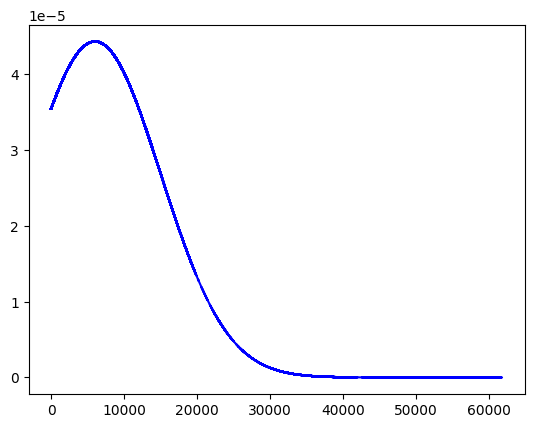

In [ ]:
y_2=norm(loc=data['Close'].mean(),scale=data['Close'].std()).pdf(data['Close'])
plt.plot(data['Close'],y_2,c='blue')
plt.show()

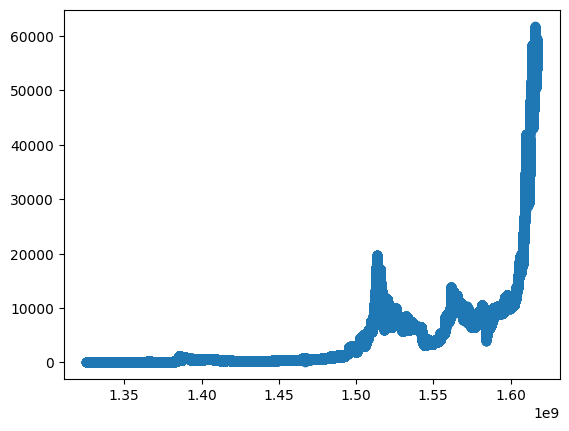

In [ ]:
plt.scatter(data['Timestamp'],data['Close'])

<Axes: xlabel='Close'>

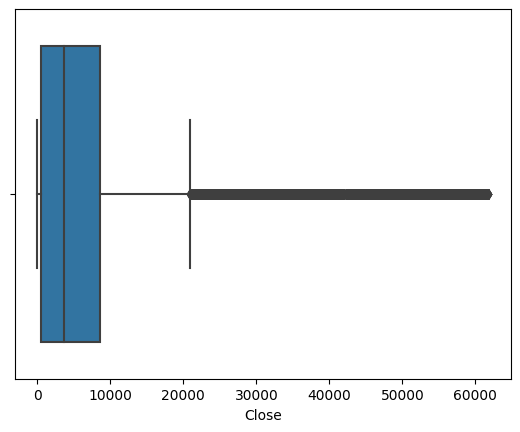

In [ ]:
sns.boxplot(x=data['Close'])

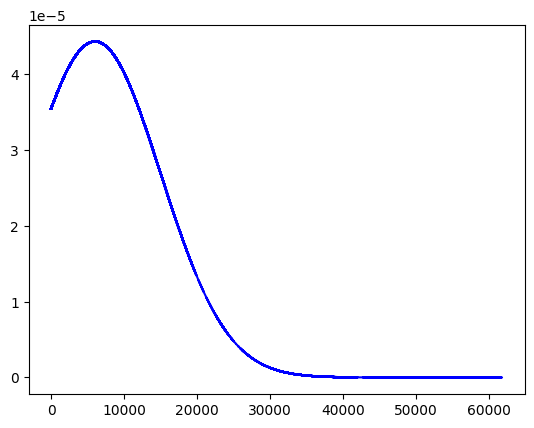

In [ ]:
y_3=norm(loc=data['High'].mean(),scale=data['High'].std()).pdf(data['High'])
plt.plot(data['High'],y_3,c='blue')
plt.show()

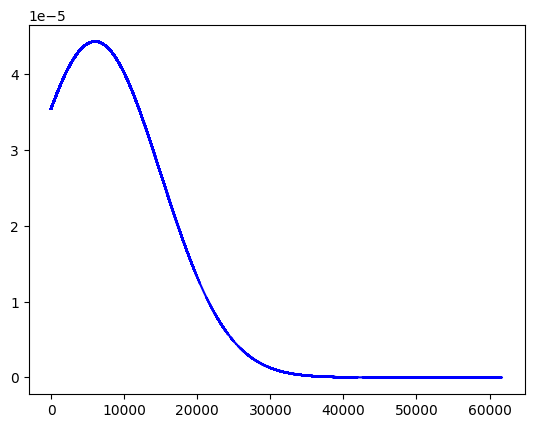

In [ ]:
y_5=norm(loc=data['Weighted_Price'].mean(),scale=data['Weighted_Price'].std()).pdf(data['Weighted_Price'])
plt.plot(data['Weighted_Price'],y_5,c='blue')
plt.show()

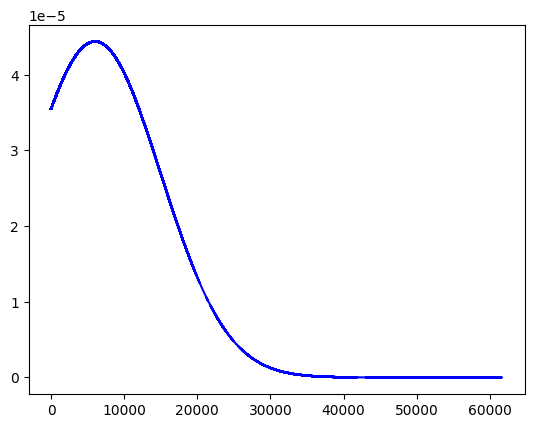

In [ ]:
y_7=norm(loc=data['Low'].mean(),scale=data['Low'].std()).pdf(data['Low'])
plt.plot(data['Low'],y_7,c='blue')
plt.show()

In [ ]:
data.isna().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [ ]:
data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')

In [ ]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
filtered_data = data[data['Timestamp'].dt.year >= 2020]

In [ ]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655201 entries, 4202176 to 4857376
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Timestamp          655201 non-null  datetime64[ns]
 1   Open               646920 non-null  float64       
 2   High               646920 non-null  float64       
 3   Low                646920 non-null  float64       
 4   Close              646920 non-null  float64       
 5   Volume_(BTC)       646920 non-null  float64       
 6   Volume_(Currency)  646920 non-null  float64       
 7   Weighted_Price     646920 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 45.0 MB


In [ ]:
filtered_data.isna().sum()

Timestamp               0
Open                 8281
High                 8281
Low                  8281
Close                8281
Volume_(BTC)         8281
Volume_(Currency)    8281
Weighted_Price       8281
dtype: int64

In [ ]:
filtered_data['Timestamp']=(filtered_data['Timestamp'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

<ipython-input-29-af58a33dd3b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Timestamp']=(filtered_data['Timestamp'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


In [ ]:
filtered_data['Timestamp']

4202176    1577836800
4202177    1577836860
4202178    1577836920
4202179    1577836980
4202180    1577837040
              ...    
4857372    1617148560
4857373    1617148620
4857374    1617148680
4857375    1617148740
4857376    1617148800
Name: Timestamp, Length: 655201, dtype: int64

In [ ]:
filtered_data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4202176,1577836800,7160.69,7160.69,7159.64,7159.64,5.501691,39392.484606,7160.068520
4202177,1577836860,7161.51,7161.51,7155.09,7161.20,3.776924,27047.304680,7161.198209
4202178,1577836920,7158.82,7158.82,7158.82,7158.82,0.029278,209.595359,7158.820000
4202179,1577836980,7158.82,7158.82,7156.90,7156.90,0.065819,471.156094,7158.321885
4202180,1577837040,7158.50,7158.50,7154.97,7157.20,0.971387,6950.500833,7155.235666
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [ ]:
imputer=KNNImputer()

In [ ]:
filtered_data=imputer.fit_transform(filtered_data)

In [ ]:
filtered_data[0]

array([1.57783680e+09, 7.16069000e+03, 7.16069000e+03, 7.15964000e+03,
       7.15964000e+03, 5.50169101e+00, 3.93924846e+04, 7.16006852e+03])

In [ ]:
filtered_data=pd.DataFrame(filtered_data, columns = ['Timestamp','Open','High','Low','Close','Volume_(BTC)','Volume_(Currency)','Weighted_Price'])

In [ ]:
filtered_data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1.577837e+09,7160.69,7160.69,7159.64,7159.64,5.501691,39392.484606,7160.068520
1,1.577837e+09,7161.51,7161.51,7155.09,7161.20,3.776924,27047.304680,7161.198209
2,1.577837e+09,7158.82,7158.82,7158.82,7158.82,0.029278,209.595359,7158.820000
3,1.577837e+09,7158.82,7158.82,7156.90,7156.90,0.065819,471.156094,7158.321885
4,1.577837e+09,7158.50,7158.50,7154.97,7157.20,0.971387,6950.500833,7155.235666
...,...,...,...,...,...,...,...,...
655196,1.617149e+09,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
655197,1.617149e+09,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
655198,1.617149e+09,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
655199,1.617149e+09,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [ ]:
filtered_data.isna().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [ ]:
filtered_data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1.577837e+09,7160.69,7160.69,7159.64,7159.64,5.501691,39392.484606,7160.068520
1,1.577837e+09,7161.51,7161.51,7155.09,7161.20,3.776924,27047.304680,7161.198209
2,1.577837e+09,7158.82,7158.82,7158.82,7158.82,0.029278,209.595359,7158.820000
3,1.577837e+09,7158.82,7158.82,7156.90,7156.90,0.065819,471.156094,7158.321885
4,1.577837e+09,7158.50,7158.50,7154.97,7157.20,0.971387,6950.500833,7155.235666
...,...,...,...,...,...,...,...,...
655196,1.617149e+09,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
655197,1.617149e+09,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
655198,1.617149e+09,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
655199,1.617149e+09,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [ ]:
filtered_data['Timestamp'] = pd.to_datetime(filtered_data['Timestamp'], unit='s')

In [ ]:
filtered_data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2020-01-01 00:00:00,7160.69,7160.69,7159.64,7159.64,5.501691,39392.484606,7160.068520
1,2020-01-01 00:01:00,7161.51,7161.51,7155.09,7161.20,3.776924,27047.304680,7161.198209
2,2020-01-01 00:02:00,7158.82,7158.82,7158.82,7158.82,0.029278,209.595359,7158.820000
3,2020-01-01 00:03:00,7158.82,7158.82,7156.90,7156.90,0.065819,471.156094,7158.321885
4,2020-01-01 00:04:00,7158.50,7158.50,7154.97,7157.20,0.971387,6950.500833,7155.235666
...,...,...,...,...,...,...,...,...
655196,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
655197,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
655198,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
655199,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [ ]:
filtered_data['Timestamp']=(filtered_data['Timestamp'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [ ]:
filtered_data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1577836800,7160.69,7160.69,7159.64,7159.64,5.501691,39392.484606,7160.068520
1,1577836860,7161.51,7161.51,7155.09,7161.20,3.776924,27047.304680,7161.198209
2,1577836920,7158.82,7158.82,7158.82,7158.82,0.029278,209.595359,7158.820000
3,1577836980,7158.82,7158.82,7156.90,7156.90,0.065819,471.156094,7158.321885
4,1577837040,7158.50,7158.50,7154.97,7157.20,0.971387,6950.500833,7155.235666
...,...,...,...,...,...,...,...,...
655196,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
655197,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
655198,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
655199,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [ ]:
filtered_data.to_csv('filtered_data.csv')

In [4]:
filtered_data=pd.read_csv('/content/drive/MyDrive/bitcoin dataset/filtered_data.csv')

In [5]:
filtered_data.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
filtered_data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1577836800,7160.69,7160.69,7159.64,7159.64,5.501691,39392.484606,7160.068520
1,1577836860,7161.51,7161.51,7155.09,7161.20,3.776924,27047.304680,7161.198209
2,1577836920,7158.82,7158.82,7158.82,7158.82,0.029278,209.595359,7158.820000
3,1577836980,7158.82,7158.82,7156.90,7156.90,0.065819,471.156094,7158.321885
4,1577837040,7158.50,7158.50,7154.97,7157.20,0.971387,6950.500833,7155.235666
...,...,...,...,...,...,...,...,...
655196,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
655197,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
655198,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
655199,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [7]:
x=filtered_data.drop('Close',axis=1)

In [8]:
x

,Timestamp,Open,High,Low,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1577836800,7160.69,7160.69,7159.64,5.501691,39392.484606,7160.068520
1,1577836860,7161.51,7161.51,7155.09,3.776924,27047.304680,7161.198209
2,1577836920,7158.82,7158.82,7158.82,0.029278,209.595359,7158.820000
3,1577836980,7158.82,7158.82,7156.90,0.065819,471.156094,7158.321885
4,1577837040,7158.50,7158.50,7154.97,0.971387,6950.500833,7155.235666
...,...,...,...,...,...,...,...
655196,1617148560,58714.31,58714.31,58686.00,1.384487,81259.372187,58692.753339
655197,1617148620,58683.97,58693.43,58683.97,7.294848,428158.146640,58693.226508
655198,1617148680,58693.43,58723.84,58693.43,1.705682,100117.070370,58696.198496
655199,1617148740,58742.18,58770.38,58742.18,0.720415,42332.958633,58761.866202


In [9]:
y=filtered_data['Close']

In [10]:
y

0          7159.64
1          7161.20
2          7158.82
3          7156.90
4          7157.20
            ...   
655196    58686.00
655197    58685.81
655198    58723.84
655199    58760.59
655200    58778.18
Name: Close, Length: 655201, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42,shuffle=False)

In [12]:
X_train

,Timestamp,Open,High,Low,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1577836800,7160.69,7160.69,7159.64,5.501691,39392.484606,7160.068520
1,1577836860,7161.51,7161.51,7155.09,3.776924,27047.304680,7161.198209
2,1577836920,7158.82,7158.82,7158.82,0.029278,209.595359,7158.820000
3,1577836980,7158.82,7158.82,7156.90,0.065819,471.156094,7158.321885
4,1577837040,7158.50,7158.50,7154.97,0.971387,6950.500833,7155.235666
...,...,...,...,...,...,...,...
458635,1605354900,15933.71,15933.71,15933.71,0.012039,191.828006,15933.710000
458636,1605354960,15945.63,15958.45,15943.13,12.894949,205678.991560,15950.353462
458637,1605355020,15950.00,15958.00,15945.32,13.469396,214877.544600,15953.020191
458638,1605355080,15948.78,15948.78,15941.92,0.894725,14267.936683,15946.735480


In [13]:
scaler=MinMaxScaler()

In [14]:
X_train_scaled=scaler.fit_transform(X_train)

In [15]:
X_train_scaled[0]

array([0.        , 0.26143846, 0.25730238, 0.2619445 , 0.00500905,
       0.00377106, 0.26031007])

In [16]:
X_test

,Timestamp,Open,High,Low,Volume_(BTC),Volume_(Currency),Weighted_Price
458640,1605355200,15941.86,15941.86,15923.22,3.241282,51638.712362,15931.571430
458641,1605355260,15920.00,15925.10,15912.43,2.989160,47577.991017,15916.844584
458642,1605355320,15922.42,15922.42,15894.89,7.527337,119756.074460,15909.487467
458643,1605355380,15903.03,15907.73,15897.70,0.648515,10312.287968,15901.375687
458644,1605355440,15903.16,15903.16,15891.76,1.145103,18202.548379,15895.993886
...,...,...,...,...,...,...,...
655196,1617148560,58714.31,58714.31,58686.00,1.384487,81259.372187,58692.753339
655197,1617148620,58683.97,58693.43,58683.97,7.294848,428158.146640,58693.226508
655198,1617148680,58693.43,58723.84,58693.43,1.705682,100117.070370,58696.198496
655199,1617148740,58742.18,58770.38,58742.18,0.720415,42332.958633,58761.866202


In [17]:
y_test

458640    15930.48
458641    15912.43
458642    15897.88
458643    15903.73
458644    15897.84
            ...   
655196    58686.00
655197    58685.81
655198    58723.84
655199    58760.59
655200    58778.18
Name: Close, Length: 196561, dtype: float64

In [18]:
X_test_scaled=scaler.transform(X_test)

In [19]:
X_test_scaled[0]

array([1.00000218, 0.9566061 , 0.95602456, 0.95554611, 0.00295105,
       0.0049434 , 0.95557475])

**Simple linear Regression model**

In [21]:
lr_model=LinearRegression()

In [22]:
lr_model.fit(X_train_scaled,y_train)

LinearRegression()

In [23]:
lr_model.score(X_train_scaled,y_train)

0.9999950562692286

In [24]:
y_predict=lr_model.predict(X_test_scaled)

**Evaluating the model**

In [25]:
r2 = r2_score(y_test, y_predict)

In [26]:
r2

0.9999968215547521

In [27]:
from sklearn.metrics import mean_absolute_error


In [28]:
mae_lr=mean_absolute_error(y_test, y_predict)
print(mae_lr)

16.202935494033394


**Save linear regression model**

In [ ]:
pickle.dump(lr_model, open('lr_model.pkl','wb'))

In [ ]:
from sklearn.metrics import mean_squared_error

In [29]:
mse1 = mean_squared_error(y_test, y_predict)


In [30]:
mse1

629.9301896442875

**Simple XGBoost model**

In [31]:
xgb_model=XGBRegressor()

In [34]:
X_train

,Timestamp,Open,High,Low,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1577836800,7160.69,7160.69,7159.64,5.501691,39392.484606,7160.068520
1,1577836860,7161.51,7161.51,7155.09,3.776924,27047.304680,7161.198209
2,1577836920,7158.82,7158.82,7158.82,0.029278,209.595359,7158.820000
3,1577836980,7158.82,7158.82,7156.90,0.065819,471.156094,7158.321885
4,1577837040,7158.50,7158.50,7154.97,0.971387,6950.500833,7155.235666
...,...,...,...,...,...,...,...
458635,1605354900,15933.71,15933.71,15933.71,0.012039,191.828006,15933.710000
458636,1605354960,15945.63,15958.45,15943.13,12.894949,205678.991560,15950.353462
458637,1605355020,15950.00,15958.00,15945.32,13.469396,214877.544600,15953.020191
458638,1605355080,15948.78,15948.78,15941.92,0.894725,14267.936683,15946.735480


In [35]:
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [36]:
X_test

,Timestamp,Open,High,Low,Volume_(BTC),Volume_(Currency),Weighted_Price
458640,1605355200,15941.86,15941.86,15923.22,3.241282,51638.712362,15931.571430
458641,1605355260,15920.00,15925.10,15912.43,2.989160,47577.991017,15916.844584
458642,1605355320,15922.42,15922.42,15894.89,7.527337,119756.074460,15909.487467
458643,1605355380,15903.03,15907.73,15897.70,0.648515,10312.287968,15901.375687
458644,1605355440,15903.16,15903.16,15891.76,1.145103,18202.548379,15895.993886
...,...,...,...,...,...,...,...
655196,1617148560,58714.31,58714.31,58686.00,1.384487,81259.372187,58692.753339
655197,1617148620,58683.97,58693.43,58683.97,7.294848,428158.146640,58693.226508
655198,1617148680,58693.43,58723.84,58693.43,1.705682,100117.070370,58696.198496
655199,1617148740,58742.18,58770.38,58742.18,0.720415,42332.958633,58761.866202


In [37]:
XGB_y_predict=xgb_model.predict(X_test)

In [38]:
r2_xgb=r2_score(y_test,XGB_y_predict)

In [39]:
r2_xgb

-1.9994462309475214

In [33]:
mae_xgb=mean_absolute_error(y_test,XGB_y_predict)
print(mae_xgb)

19914.36480095194


**Random forest regressor with hyperparameter tuning**

In [ ]:
rf_model=RandomForestRegressor()

In [ ]:
rf_parameters={
    'n_estimators':[100,200,300],
    'max_depth':[3,4,5],
}

In [ ]:
rf_grid=GridSearchCV(estimator=rf_model,
                param_grid=rf_parameters,
                scoring="r2",
                refit='r2',
                cv=5,
                verbose=4
                )

In [ ]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .....max_depth=3, n_estimators=100;, score=0.744 total time= 2.1min
[CV 2/5] END ....max_depth=3, n_estimators=100;, score=-0.200 total time= 1.7min
[CV 3/5] END .....max_depth=3, n_estimators=100;, score=0.345 total time= 1.7min
[CV 4/5] END .....max_depth=3, n_estimators=100;, score=0.896 total time= 1.7min
[CV 5/5] END .....max_depth=3, n_estimators=100;, score=0.080 total time= 1.7min
[CV 1/5] END .....max_depth=3, n_estimators=200;, score=0.744 total time= 3.3min
[CV 2/5] END ....max_depth=3, n_estimators=200;, score=-0.200 total time= 3.3min
[CV 3/5] END .....max_depth=3, n_estimators=200;, score=0.346 total time= 3.3min
[CV 4/5] END .....max_depth=3, n_estimators=200;, score=0.896 total time= 3.4min
[CV 5/5] END .....max_depth=3, n_estimators=200;, score=0.080 total time= 3.3min
[CV 1/5] END .....max_depth=3, n_estimators=300;, score=0.744 total time= 5.0min
[CV 2/5] END ....max_depth=3, n_estimators=300;, 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             refit='r2', scoring='r2', verbose=4)

In [ ]:
print(rf_grid.best_params_)

{'max_depth': 5, 'n_estimators': 300}


In [ ]:
rf_best_model=rf_grid.best_estimator_

In [ ]:
ypred_best_rf=rf_best_model.predict(X_test)

In [ ]:
r2_rf_best_model=r2_score(y_test,ypred_best_rf)

In [ ]:
r2_rf_best_model

-2.0464394597772446

In [ ]:
import pickle

In [ ]:
rf_saved_model = pickle.dumps(rf_best_model)

In [ ]:
pickle.dump(rf_best_model, open('rf_model.pkl','wb'))

**Random forest hyperparameter tuning using another scoring method**

In [ ]:
rf2_parameters={
    'n_estimators':[100,200,300],
    'max_depth':[3,4,5],
}

In [ ]:
rf2_grid=GridSearchCV(estimator=rf_model,
                param_grid=rf2_parameters,
                scoring='neg_mean_absolute_error',
                cv=5,
                verbose=4
                )

In [ ]:
rf2_grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..max_depth=3, n_estimators=100;, score=-347.887 total time= 1.2min
[CV 2/5] END ..max_depth=3, n_estimators=100;, score=-937.718 total time= 1.2min
[CV 3/5] END ..max_depth=3, n_estimators=100;, score=-207.368 total time= 1.2min
[CV 4/5] END ..max_depth=3, n_estimators=100;, score=-280.084 total time= 1.2min
[CV 5/5] END .max_depth=3, n_estimators=100;, score=-1165.097 total time= 1.2min
[CV 1/5] END ..max_depth=3, n_estimators=200;, score=-347.912 total time= 2.4min
[CV 2/5] END ..max_depth=3, n_estimators=200;, score=-937.528 total time= 2.4min
[CV 3/5] END ..max_depth=3, n_estimators=200;, score=-207.240 total time= 2.4min
[CV 4/5] END ..max_depth=3, n_estimators=200;, score=-280.111 total time= 2.5min
[CV 5/5] END .max_depth=3, n_estimators=200;, score=-1164.903 total time= 2.4min
[CV 1/5] END ..max_depth=3, n_estimators=300;, score=-347.758 total time= 3.6min
[CV 2/5] END ..max_depth=3, n_estimators=300;, sc

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error', verbose=4)

In [ ]:
print(rf2_grid.best_params_)

{'max_depth': 5, 'n_estimators': 100}


In [ ]:
rf2_best_model=rf2_grid.best_estimator_

In [ ]:
ypred_best_rf2=rf2_best_model.predict(X_test)

In [44]:
##actually it's not error but it requires me to perform grid search again
mae_rf2=mean_absolute_error(y_test,ypred_best_rf2)
print(mae_rf2)

NameError: ignored

In [ ]:
pickle.dump(rf2_best_model, open('rf2_model.pkl','wb'))

In [45]:
loaded_model = pickle.load(open("/content/drive/MyDrive/bitcoin dataset/rf2_model.pkl", "rb"))


In [35]:
loaded_predict=loaded_model.predict(X_test)

In [46]:
mae_rf2_loaded=mean_absolute_error(y_test,loaded_predict)
print(mae_rf2_loaded)

20143.709577613332


In [ ]:
r2_loaded_rf2=r2_score(y_test,loaded_predict)
print(r2_loaded_rf2)

-2.046431994045686


In [ ]:
X_test.shape

(196561, 7)

In [ ]:
Xtest_dataframe=pd.DataFrame(X_test, columns = ['Timestamp','Open','High','Low','Volume_(BTC)','Volume_(Currency)','Weighted_Price'])

In [ ]:
Xtest_dataframe

,Timestamp,Open,High,Low,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1.000002,0.956606,0.956025,0.955546,0.002951,0.004943,0.955575
1,1.000004,0.954876,0.954691,0.954692,0.002722,0.004555,0.954407
2,1.000007,0.955067,0.954478,0.953304,0.006853,0.011464,0.953824
3,1.000009,0.953532,0.953309,0.953526,0.000590,0.000987,0.953181
4,1.000011,0.953542,0.952945,0.953056,0.001043,0.001743,0.952755
...,...,...,...,...,...,...,...
196556,1.428566,4.342718,4.359450,4.340046,0.001261,0.007779,4.344998
196557,1.428568,4.340316,4.357789,4.339885,0.006642,0.040988,4.345036
196558,1.428570,4.341065,4.360209,4.340634,0.001553,0.009584,4.345272
196559,1.428572,4.344924,4.363912,4.344492,0.000656,0.004053,4.350477


**Visualization of Linear regression prediction to true values**

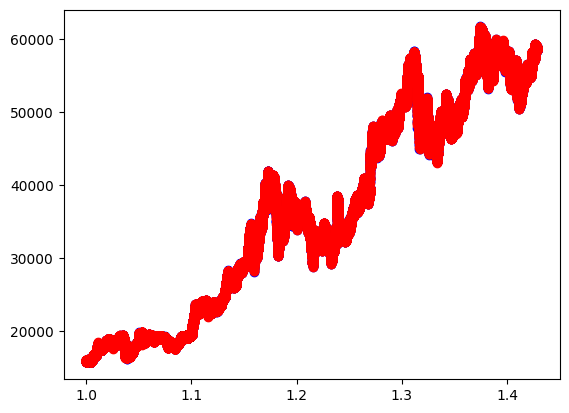

In [ ]:
plt.scatter(Xtest_dataframe['Timestamp'],y_test,color='blue')
plt.scatter(Xtest_dataframe['Timestamp'],y_predict,color='red')
plt.show()

**Visualization of Random forest true values vs predicted values**

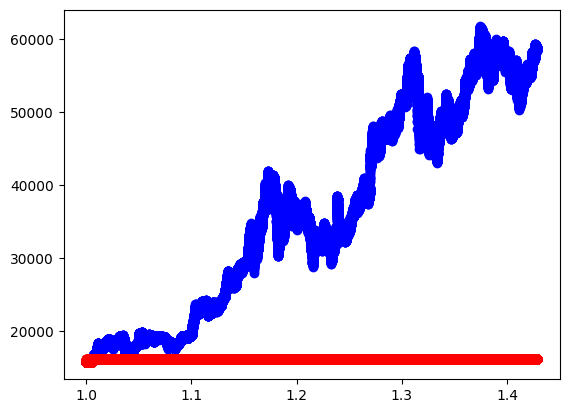

In [ ]:
plt.scatter(Xtest_dataframe['Timestamp'],y_test,color='blue')
plt.scatter(Xtest_dataframe['Timestamp'],loaded_predict,color='red')
plt.show()

In [ ]:
import datetime

# Create a datetime object
dt = datetime.datetime(2023, 8, 25, 10, 30, 0)

# Convert datetime to Unix timestamp
timestamp = dt.timestamp()
print(dt)
print(timestamp)

2023-08-25 10:30:00
1692959400.0


In [ ]:
# Unix timestamp
timestamp = 1605355200

# Convert Unix timestamp to datetime
dt = datetime.datetime.fromtimestamp(timestamp)

print(dt)

2020-11-14 12:00:00


In [ ]:
from joblib import dump, load

In [ ]:
dump(scaler, 'scaler.joblib')

['scaler.joblib']

*XGBoost regressor *

In [ ]:
XGBB=XGBRegressor()

In [ ]:
XGB_x=x

In [ ]:
XGB_y=y

In [ ]:
XGB_x

,Timestamp,Open,High,Low,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1577836800,7160.69,7160.69,7159.64,5.501691,39392.484606,7160.068520
1,1577836860,7161.51,7161.51,7155.09,3.776924,27047.304680,7161.198209
2,1577836920,7158.82,7158.82,7158.82,0.029278,209.595359,7158.820000
3,1577836980,7158.82,7158.82,7156.90,0.065819,471.156094,7158.321885
4,1577837040,7158.50,7158.50,7154.97,0.971387,6950.500833,7155.235666
...,...,...,...,...,...,...,...
655196,1617148560,58714.31,58714.31,58686.00,1.384487,81259.372187,58692.753339
655197,1617148620,58683.97,58693.43,58683.97,7.294848,428158.146640,58693.226508
655198,1617148680,58693.43,58723.84,58693.43,1.705682,100117.070370,58696.198496
655199,1617148740,58742.18,58770.38,58742.18,0.720415,42332.958633,58761.866202


In [ ]:
XGB_y

0          7159.64
1          7161.20
2          7158.82
3          7156.90
4          7157.20
            ...   
655196    58686.00
655197    58685.81
655198    58723.84
655199    58760.59
655200    58778.18
Name: Close, Length: 655201, dtype: float64

In [ ]:
XGB_x['Timestamp']=pd.to_datetime(XGB_x['Timestamp'], unit='s')

In [ ]:
XGB_x

,Timestamp,Open,High,Low,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2020-01-01 00:00:00,7160.69,7160.69,7159.64,5.501691,39392.484606,7160.068520
1,2020-01-01 00:01:00,7161.51,7161.51,7155.09,3.776924,27047.304680,7161.198209
2,2020-01-01 00:02:00,7158.82,7158.82,7158.82,0.029278,209.595359,7158.820000
3,2020-01-01 00:03:00,7158.82,7158.82,7156.90,0.065819,471.156094,7158.321885
4,2020-01-01 00:04:00,7158.50,7158.50,7154.97,0.971387,6950.500833,7155.235666
...,...,...,...,...,...,...,...
655196,2021-03-30 23:56:00,58714.31,58714.31,58686.00,1.384487,81259.372187,58692.753339
655197,2021-03-30 23:57:00,58683.97,58693.43,58683.97,7.294848,428158.146640,58693.226508
655198,2021-03-30 23:58:00,58693.43,58723.84,58693.43,1.705682,100117.070370,58696.198496
655199,2021-03-30 23:59:00,58742.18,58770.38,58742.18,0.720415,42332.958633,58761.866202


In [ ]:
XGB_x['Year']=XGB_x['Timestamp'].dt.year

In [ ]:
XGB_x['Month']=XGB_x['Timestamp'].dt.month

In [ ]:
XGB_x['Day']=XGB_x['Timestamp'].dt.day

In [ ]:
XGB_x['Hour']=XGB_x['Timestamp'].dt.hour

In [ ]:
XGB_x['Minute']=XGB_x['Timestamp'].dt.minute

In [ ]:
XGB_x.drop('Timestamp',axis=1,inplace=True)

In [ ]:
XGB_x

,Open,High,Low,Volume_(BTC),Volume_(Currency),Weighted_Price,Year,Month,Day,Hour,Minute
0,7160.69,7160.69,7159.64,5.501691,39392.484606,7160.068520,2020,1,1,0,0
1,7161.51,7161.51,7155.09,3.776924,27047.304680,7161.198209,2020,1,1,0,1
2,7158.82,7158.82,7158.82,0.029278,209.595359,7158.820000,2020,1,1,0,2
3,7158.82,7158.82,7156.90,0.065819,471.156094,7158.321885,2020,1,1,0,3
4,7158.50,7158.50,7154.97,0.971387,6950.500833,7155.235666,2020,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...
655196,58714.31,58714.31,58686.00,1.384487,81259.372187,58692.753339,2021,3,30,23,56
655197,58683.97,58693.43,58683.97,7.294848,428158.146640,58693.226508,2021,3,30,23,57
655198,58693.43,58723.84,58693.43,1.705682,100117.070370,58696.198496,2021,3,30,23,58
655199,58742.18,58770.38,58742.18,0.720415,42332.958633,58761.866202,2021,3,30,23,59


In [ ]:
xgb_scaler=MinMaxScaler()

In [ ]:
XGB_X_train, XGB_X_test, XGB_y_train, XGB_y_test = train_test_split(XGB_x, XGB_y, test_size=0.3, random_state=42,shuffle=False)

In [ ]:
XGB_X_train=xgb_scaler.fit_transform(XGB_X_train)

In [ ]:
XGB_X_test=xgb_scaler.transform(XGB_X_test)

In [ ]:
XGBB.fit(XGB_X_train,XGB_y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
XGBB_y_predict=XGBB.predict(XGB_X_test)

In [ ]:
XGBB_r2 = r2_score(XGB_y_test, XGBB_y_predict)

In [ ]:
XGBB_r2

-1.9993720818140557

In [ ]:
mean_absolute_error(XGB_y_test,XGBB_y_predict)

19912.510575485034

In [47]:
mae_values=[mae_lr,mae_xgb,mae_rf2_loaded]

In [53]:
model_names = ['Linear regression', 'XGBoost', 'Random forest']
colors = ['green', 'blue', 'yellow']

**Model Selection based on mean absolute error**

<BarContainer object of 3 artists>

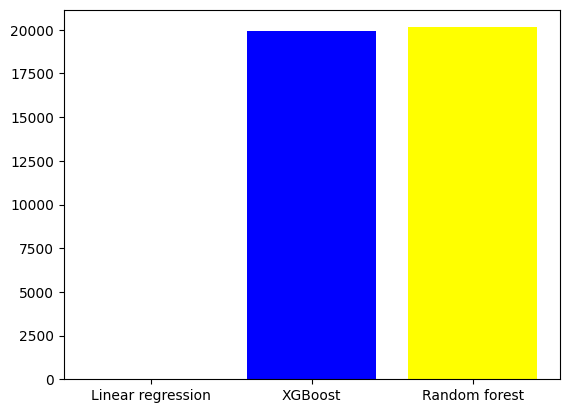

In [54]:
plt.bar(model_names, mae_values,color=colors)